In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [5]:
data = pd.read_csv("C:global-data-on-sustainable-energy (1) (3).csv")

In [7]:
data

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [9]:
print(data.shape)

(3649, 21)


In [11]:
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [15]:
data.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [17]:
print(data.describe(include="object"))

             Entity Density
count          3649    3648
unique          176     124
top     Afghanistan      25
freq             21     147


In [19]:
print(data.isnull().sum())

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [21]:
for col in data.select_dtypes(include="object").columns:
    print(f"{col}: {data[col].unique()}")

Entity: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lebanon'

In [23]:
print(data.duplicated().sum()) 

0


In [25]:
#Detecting outliers by IQR method
numerical_cols = data.select_dtypes(include=["number"]).columns

# Compute IQR for each numerical column
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)).sum()

print("Number of outliers in each column:")
print(outliers)

Number of outliers in each column:
Year                                                                  0
Access to electricity (% of population)                               0
Access to clean fuels for cooking                                     0
Renewable-electricity-generating-capacity-per-capita                301
Financial flows to developing countries (US $)                      245
Renewable energy share in the total final energy consumption (%)      0
Electricity from fossil fuels (TWh)                                 518
Electricity from nuclear (TWh)                                      578
Electricity from renewables (TWh)                                   533
Low-carbon electricity (% electricity)                                0
Primary energy consumption per capita (kWh/person)                  237
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         278
Value_co2_emissions_kt_by_country                                   471
Renewables (% equivalent prim

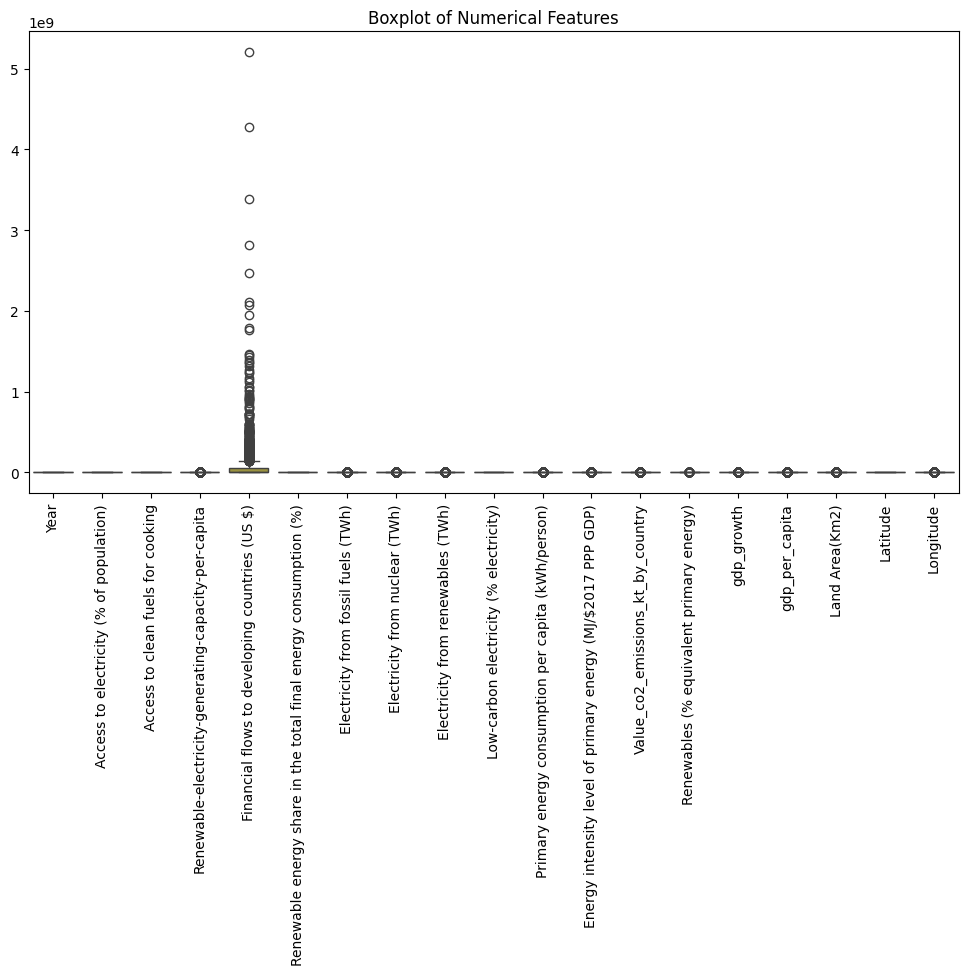

In [27]:
#Detecting outliers by Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

In [29]:
#Outlier detection by Z score
from scipy.stats import zscore

# Compute Z-scores
z_scores = data[numerical_cols].apply(zscore)

# Find outliers (values with |Z-score| > 3)
outliers_z = (z_scores.abs() > 3).sum()

print("Number of outliers using Z-score method:")
print(outliers_z)

Number of outliers using Z-score method:
Year                                                                  0
Access to electricity (% of population)                               0
Access to clean fuels for cooking                                     0
Renewable-electricity-generating-capacity-per-capita                  0
Financial flows to developing countries (US $)                        0
Renewable energy share in the total final energy consumption (%)      0
Electricity from fossil fuels (TWh)                                   0
Electricity from nuclear (TWh)                                        0
Electricity from renewables (TWh)                                     0
Low-carbon electricity (% electricity)                                0
Primary energy consumption per capita (kWh/person)                  103
Energy intensity level of primary energy (MJ/$2017 PPP GDP)           0
Value_co2_emissions_kt_by_country                                     0
Renewables (% equivalen

In [31]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")  # You can use "mean" as well
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])


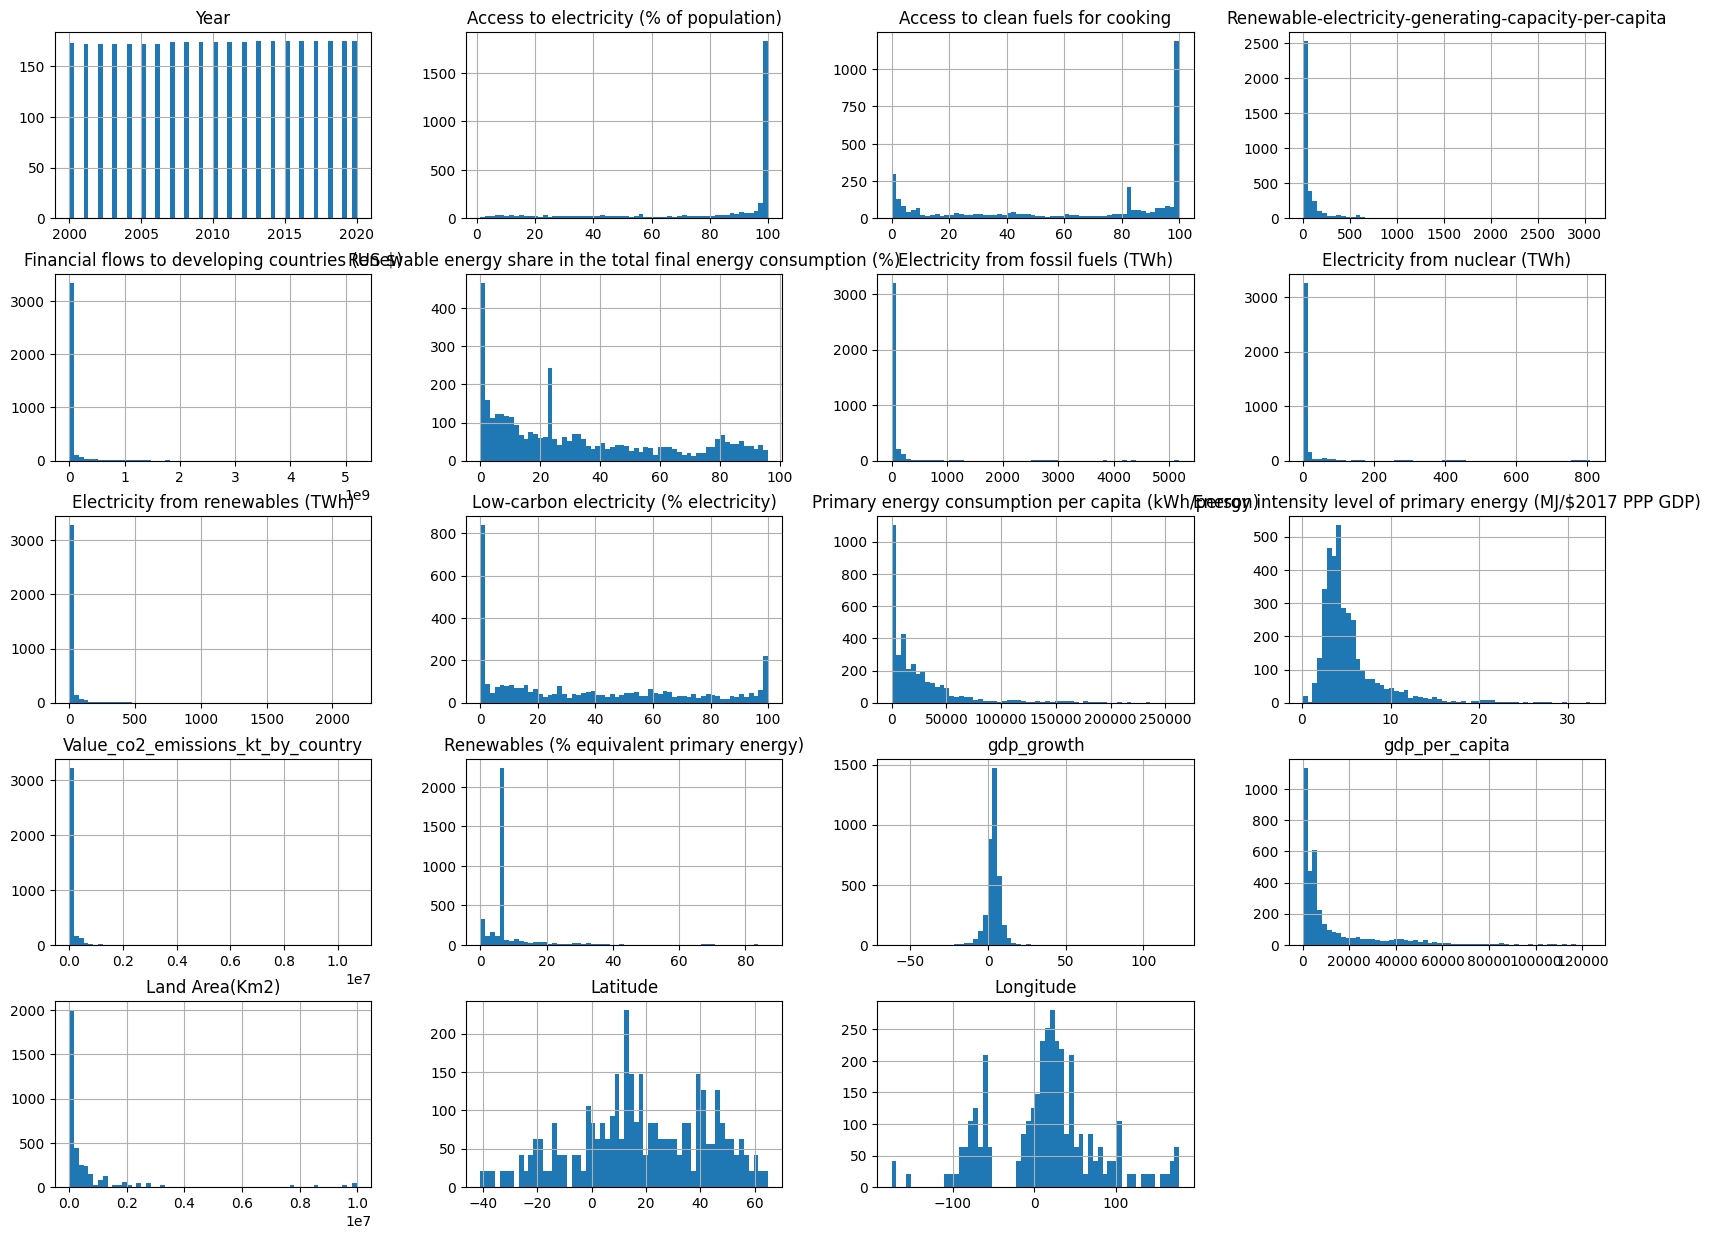

In [33]:
#Plotting Historgram
import seaborn as sns
import matplotlib.pyplot as plt

data.hist(figsize=(20, 15), bins=60)
plt.show()

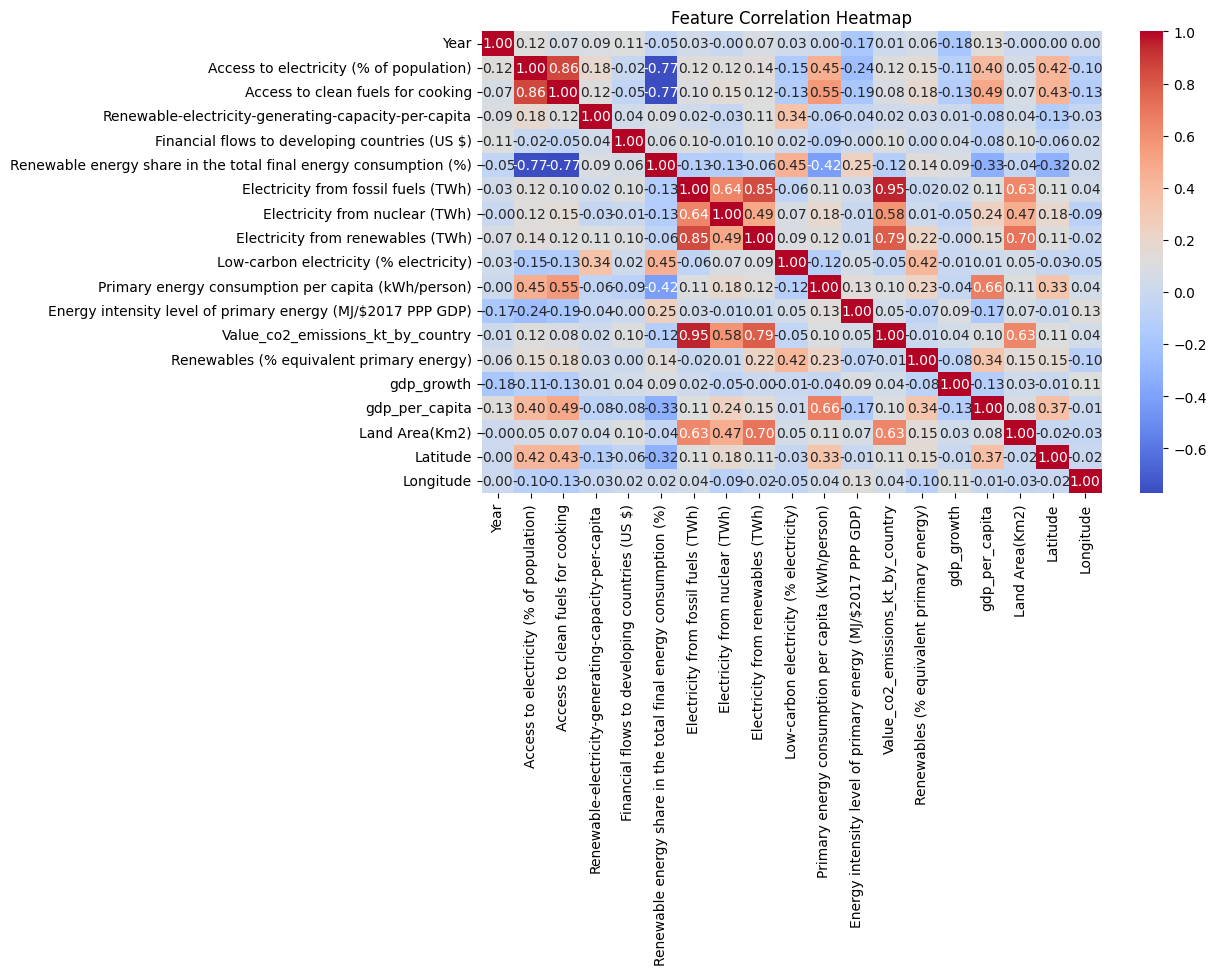

In [34]:
#Coreation matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_data = data.select_dtypes(include=["number"])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

CLASSIFICATION- CO2 EMISSIONS

In [38]:
data.shape

(3649, 21)

In [40]:
missing_values = data.isnull().sum()
missing_values

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
Renewables (% equiva

In [50]:
categorical_columns = ["Entity"]
data= pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display updated dataset structure
data.info()

KeyError: "None of [Index(['Entity'], dtype='object')] are in the [columns]"

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
data["Value_co2_emissions_kt_by_country"] = label_encoder.fit_transform(data["Value_co2_emissions_kt_by_country"])

# Check label encoding mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)  

In [53]:
# Convert numerical columns to proper numeric format
data[numerical_columns] = data[numerical_columns].replace({",": ""}, regex=True).apply(pd.to_numeric)


In [55]:
from sklearn.preprocessing import MinMaxScaler

# Define numerical features for scaling
numerical_columns = [
    "Year",
    "Access to electricity (% of population)",
    "Access to clean fuels for cooking",
    "Renewable-electricity-generating-capacity-per-capita",
    "Financial flows to developing countries (US $)",
    "Renewable energy share in the total final energy consumption (%)",
    "Electricity from fossil fuels (TWh)",
    "Electricity from nuclear (TWh)",
    "Electricity from renewables (TWh)",
    "Low-carbon electricity (% electricity)",
    "Primary energy consumption per capita (kWh/person)",
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
    "Value_co2_emissions_kt_by_country",
    "gdp_growth",
    "gdp_per_capita",
    "Density",
    "Land Area(Km2)",
    "Latitude",
    "Longitude"
]

# Apply MinMax Scaling
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display first few rows after scaling
data.head()


,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),...,Entity_Ukraine,Entity_United Arab Emirates,Entity_United Kingdom,Entity_United States,Entity_Uruguay,Entity_Uzbekistan,Entity_Vanuatu,Entity_Yemen,Entity_Zambia,Entity_Zimbabwe
0,0.00,0.003659,0.062,0.003013,0.000004,0.468451,0.000031,0.0,0.000142,0.659574,...,False,False,False,False,False,False,False,False,False,False
1,0.05,0.028581,0.072,0.002895,0.000025,0.474802,0.000017,0.0,0.000229,0.847458,...,False,False,False,False,False,False,False,False,False,False
2,0.10,0.082603,0.082,0.002768,0.000759,0.393898,0.000025,0.0,0.000256,0.811594,...,False,False,False,False,False,False,False,False,False,False
3,0.15,0.136573,0.095,0.002644,0.004992,0.381716,0.000060,0.0,0.000288,0.670213,...,False,False,False,False,False,False,False,False,False,False
4,0.20,0.190513,0.109,0.002533,0.001089,0.460641,0.000064,0.0,0.000256,0.629213,...,False,False,False,False,False,False,False,False,False,False


In [57]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data.drop(columns=["Value_co2_emissions_kt_by_country"])
y = data["Value_co2_emissions_kt_by_country"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
X.shape
y.shape

(3649,)

In [61]:
from sklearn.preprocessing import KBinsDiscretizer

# Create binning object with 5 bins (change if needed)
binning = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

# Apply binning to convert continuous values into discrete bins
y_train_binned = binning.fit_transform(y_train.values.reshape(-1, 1)).astype(int)
y_test_binned = binning.transform(y_test.values.reshape(-1, 1)).astype(int)

# Check distribution of bins
print(pd.Series(y_train_binned.flatten()).value_counts())


1    586
3    584
4    584
2    583
0    582
Name: count, dtype: int64


In [63]:
print(X_train.dtypes)


Year                                                    float64
Access to electricity (% of population)                 float64
Access to clean fuels for cooking                       float64
Renewable-electricity-generating-capacity-per-capita    float64
Financial flows to developing countries (US $)          float64
                                                         ...   
Entity_Uzbekistan                                          bool
Entity_Vanuatu                                             bool
Entity_Yemen                                               bool
Entity_Zambia                                              bool
Entity_Zimbabwe                                            bool
Length: 194, dtype: object


In [65]:
print(X_train.isna().sum())
print(X_test.isna().sum())


Year                                                    0
Access to electricity (% of population)                 0
Access to clean fuels for cooking                       0
Renewable-electricity-generating-capacity-per-capita    0
Financial flows to developing countries (US $)          0
                                                       ..
Entity_Uzbekistan                                       0
Entity_Vanuatu                                          0
Entity_Yemen                                            0
Entity_Zambia                                           0
Entity_Zimbabwe                                         0
Length: 194, dtype: int64
Year                                                    0
Access to electricity (% of population)                 0
Access to clean fuels for cooking                       0
Renewable-electricity-generating-capacity-per-capita    0
Financial flows to developing countries (US $)          0
                                              

In [67]:
X_train = X_train.fillna(X_train.mean())  # Fill with mean
X_test = X_test.fillna(X_test.mean())  

In [69]:
print(X_train.dtypes) 

Year                                                    float64
Access to electricity (% of population)                 float64
Access to clean fuels for cooking                       float64
Renewable-electricity-generating-capacity-per-capita    float64
Financial flows to developing countries (US $)          float64
                                                         ...   
Entity_Uzbekistan                                          bool
Entity_Vanuatu                                             bool
Entity_Yemen                                               bool
Entity_Zambia                                              bool
Entity_Zimbabwe                                            bool
Length: 194, dtype: object


In [71]:
print("NaN values in dataset:\n", data.isnull().sum())
print("\nData types:\n", data.dtypes)
print("\nUnique values in target:\n", data["Value_co2_emissions_kt_by_country"].nunique())
print("\nFirst few rows:\n", data.head())

NaN values in dataset:
 Year                                                    0
Access to electricity (% of population)                 0
Access to clean fuels for cooking                       0
Renewable-electricity-generating-capacity-per-capita    0
Financial flows to developing countries (US $)          0
                                                       ..
Entity_Uzbekistan                                       0
Entity_Vanuatu                                          0
Entity_Yemen                                            0
Entity_Zambia                                           0
Entity_Zimbabwe                                         0
Length: 195, dtype: int64

Data types:
 Year                                                    float64
Access to electricity (% of population)                 float64
Access to clean fuels for cooking                       float64
Renewable-electricity-generating-capacity-per-capita    float64
Financial flows to developing countries (U

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ensure 'Value_co2_emissions_kt_by_country' exists in df
if "Value_co2_emissions_kt_by_country" not in data.columns:
    raise ValueError("Column 'Value_co2_emissions_kt_by_country' not found in dataset!")

# Convert 'Year' to integer
data["Year"] = data["Year"].astype(int)

# Automatic Binning (Discretizing the target variable)
binning = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile")  # Adjust bins if needed
data["co2_category"] = binning.fit_transform(data[["Value_co2_emissions_kt_by_country"]]).astype(int)

# Define features (X) and target (y)
X = data.drop(columns=["Value_co2_emissions_kt_by_country", "co2_category"])
y = data["co2_category"]

# One-Hot Encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fix NaNs after one-hot encoding
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Align train and test sets to avoid missing columns
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       146
           1       0.82      0.92      0.87       146
           2       0.87      0.86      0.87       146
           3       0.89      0.90      0.89       146
           4       0.97      0.95      0.96       146

    accuracy                           0.90       730
   macro avg       0.90      0.90      0.90       730
weighted avg       0.90      0.90      0.90       730



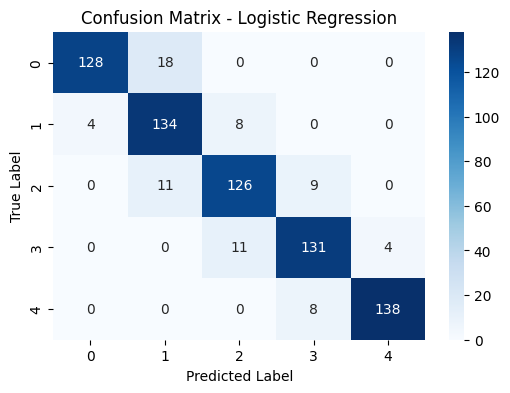

In [75]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ensure labels are correct
labels = np.unique(y_test)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


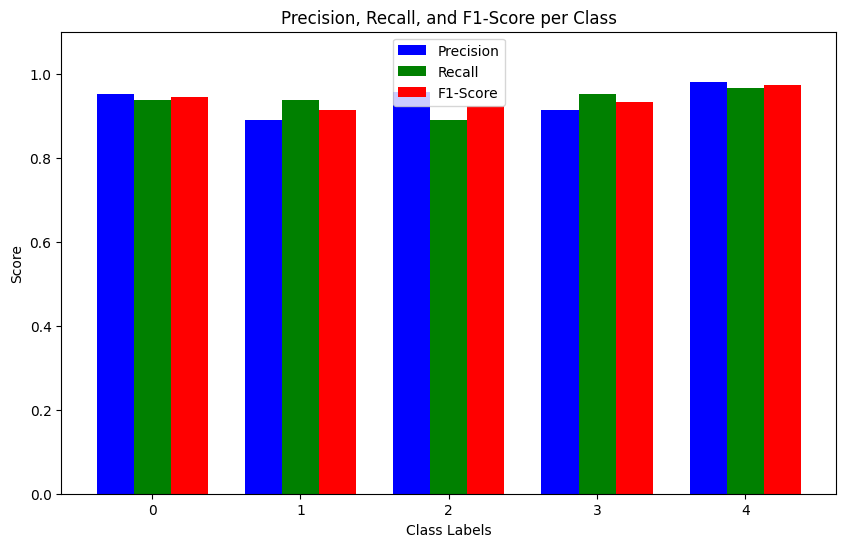

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Get classification report as a dictionary
report = classification_report(y_test, y_pred_gb, output_dict=True)

# Extract class labels
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

# Extract precision, recall, and f1-score values
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Set bar width
bar_width = 0.25
x = np.arange(len(classes))

# Plot the values
plt.figure(figsize=(10, 6))
plt.bar(x, precision, bar_width, label='Precision', color='blue')
plt.bar(x + bar_width, recall, bar_width, label='Recall', color='green')
plt.bar(x + 2 * bar_width, f1_score, bar_width, label='F1-Score', color='red')

# Labeling the plot
plt.xlabel("Class Labels")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score per Class")
plt.xticks(x + bar_width, classes)
plt.legend()
plt.ylim(0, 1.1)
plt.show()


DECSISON TREE CLASSIFIER

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [82]:
y_pred_dt = dt_classifier.predict(X_test)
y_pred_dt 

array([4, 0, 1, 0, 1, 4, 4, 2, 0, 1, 2, 2, 4, 2, 4, 3, 0, 4, 2, 0, 4, 3,
       0, 4, 2, 3, 2, 3, 2, 4, 3, 2, 2, 2, 1, 0, 0, 3, 4, 3, 4, 0, 0, 1,
       4, 0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 2, 2, 3, 4, 0, 1, 3, 2, 2, 4, 1,
       1, 0, 3, 3, 1, 3, 2, 3, 1, 0, 4, 1, 1, 1, 2, 1, 3, 3, 2, 1, 2, 1,
       3, 3, 1, 2, 2, 1, 4, 4, 4, 0, 4, 0, 4, 1, 2, 1, 3, 3, 2, 4, 1, 1,
       3, 1, 3, 0, 4, 2, 3, 0, 2, 1, 3, 1, 0, 0, 3, 0, 2, 2, 4, 2, 0, 3,
       2, 4, 2, 1, 4, 0, 2, 3, 2, 4, 2, 0, 4, 2, 3, 4, 2, 1, 4, 1, 0, 0,
       4, 1, 4, 0, 0, 3, 1, 1, 0, 4, 2, 1, 2, 0, 1, 4, 0, 4, 4, 3, 3, 0,
       2, 2, 1, 1, 4, 1, 3, 4, 2, 4, 4, 0, 1, 3, 0, 1, 0, 2, 1, 3, 0, 2,
       0, 0, 0, 0, 4, 1, 4, 2, 2, 0, 3, 3, 2, 1, 3, 1, 3, 3, 2, 2, 0, 1,
       4, 0, 4, 2, 4, 3, 0, 3, 0, 4, 0, 1, 4, 2, 4, 2, 2, 3, 0, 4, 0, 1,
       2, 2, 3, 3, 3, 4, 3, 4, 3, 2, 2, 2, 4, 0, 1, 3, 4, 3, 4, 4, 3, 1,
       4, 2, 1, 1, 2, 0, 3, 3, 0, 1, 2, 2, 2, 4, 0, 1, 2, 3, 3, 1, 3, 3,
       2, 4, 2, 0, 2, 1, 0, 1, 4, 4, 0, 3, 0, 4, 1,

In [84]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt )
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt ))

Decision Tree Accuracy: 0.9301

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       146
           1       0.91      0.88      0.90       146
           2       0.92      0.92      0.92       146
           3       0.93      0.92      0.93       146
           4       0.97      0.99      0.98       146

    accuracy                           0.93       730
   macro avg       0.93      0.93      0.93       730
weighted avg       0.93      0.93      0.93       730



Decision Tree Accuracy: 0.9301

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       146
           1       0.91      0.88      0.90       146
           2       0.92      0.92      0.92       146
           3       0.93      0.92      0.93       146
           4       0.97      0.99      0.98       146

    accuracy                           0.93       730
   macro avg       0.93      0.93      0.93       730
weighted avg       0.93      0.93      0.93       730



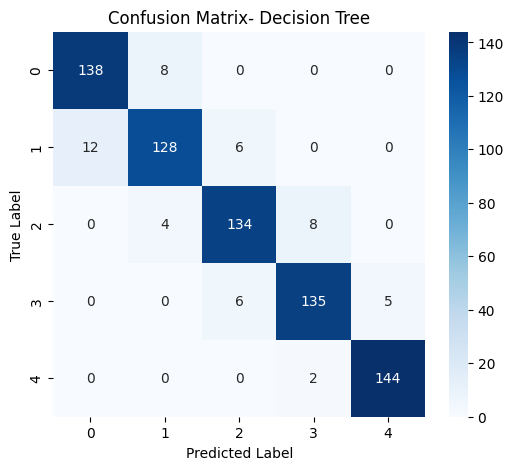

In [86]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix- Decision Tree")
plt.show()


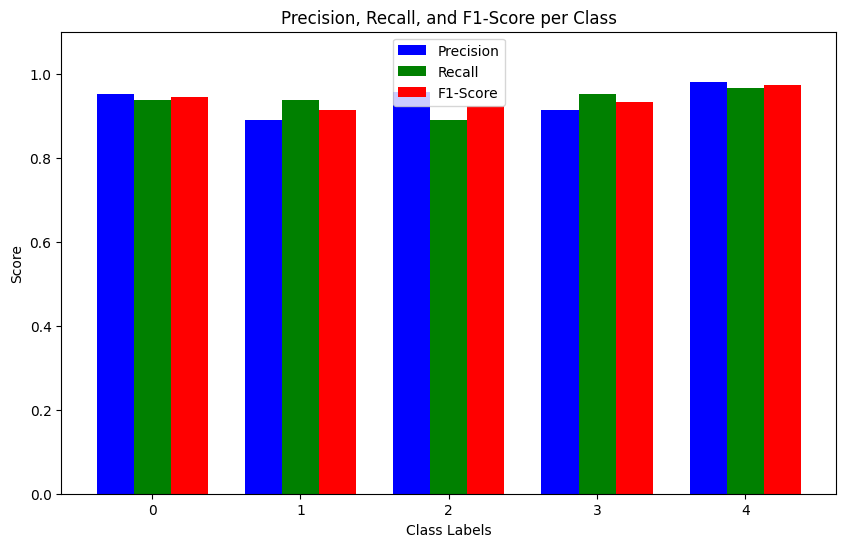

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Get classification report as a dictionary
report = classification_report(y_test, y_pred_gb, output_dict=True)

# Extract class labels
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

# Extract precision, recall, and f1-score values
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Set bar width
bar_width = 0.25
x = np.arange(len(classes))

# Plot the values
plt.figure(figsize=(10, 6))
plt.bar(x, precision, bar_width, label='Precision', color='blue')
plt.bar(x + bar_width, recall, bar_width, label='Recall', color='green')
plt.bar(x + 2 * bar_width, f1_score, bar_width, label='F1-Score', color='red')

# Labeling the plot
plt.xlabel("Class Labels")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score per Class")
plt.xticks(x + bar_width, classes)
plt.legend()
plt.ylim(0, 1.1)
plt.show()


RANDOM FOREST CLASSIFIER

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [92]:
y_pred_rfc = rf_classifier.predict(X_test)
y_pred_rfc 

array([4, 0, 1, 0, 1, 4, 4, 2, 0, 1, 2, 2, 4, 2, 4, 3, 0, 4, 2, 0, 4, 3,
       0, 4, 2, 3, 2, 3, 2, 4, 3, 2, 2, 2, 1, 0, 0, 3, 4, 3, 4, 0, 0, 1,
       4, 0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 2, 2, 4, 4, 0, 1, 3, 2, 1, 4, 1,
       1, 0, 3, 3, 1, 3, 2, 2, 1, 0, 4, 1, 1, 1, 2, 1, 3, 3, 2, 1, 2, 1,
       3, 3, 1, 2, 3, 1, 4, 4, 4, 0, 4, 0, 4, 1, 2, 1, 3, 3, 2, 4, 1, 1,
       3, 0, 3, 0, 4, 1, 3, 0, 2, 1, 3, 1, 0, 0, 3, 0, 2, 2, 4, 2, 0, 3,
       2, 4, 2, 1, 4, 0, 3, 3, 2, 4, 2, 0, 4, 2, 3, 4, 2, 1, 4, 1, 0, 0,
       4, 1, 4, 1, 0, 3, 1, 1, 0, 4, 2, 1, 2, 0, 1, 4, 0, 4, 4, 3, 3, 0,
       2, 2, 1, 1, 4, 1, 3, 4, 1, 4, 4, 0, 1, 3, 0, 1, 0, 2, 1, 3, 0, 2,
       0, 0, 0, 0, 4, 1, 4, 2, 2, 0, 3, 3, 1, 1, 3, 1, 3, 3, 2, 2, 0, 1,
       4, 0, 4, 2, 4, 3, 0, 3, 0, 4, 0, 1, 4, 2, 4, 2, 2, 3, 0, 4, 0, 1,
       2, 3, 3, 3, 3, 4, 3, 4, 3, 2, 3, 1, 3, 0, 1, 3, 4, 3, 4, 4, 3, 1,
       4, 2, 1, 1, 2, 0, 3, 3, 0, 1, 2, 2, 2, 4, 0, 1, 2, 3, 3, 1, 3, 3,
       2, 4, 2, 1, 2, 1, 0, 1, 4, 4, 0, 3, 0, 4, 1,

Random Forest Accuracy: 0.9575

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       146
           1       0.93      0.96      0.94       146
           2       0.99      0.92      0.95       146
           3       0.93      0.97      0.95       146
           4       0.98      0.98      0.98       146

    accuracy                           0.96       730
   macro avg       0.96      0.96      0.96       730
weighted avg       0.96      0.96      0.96       730



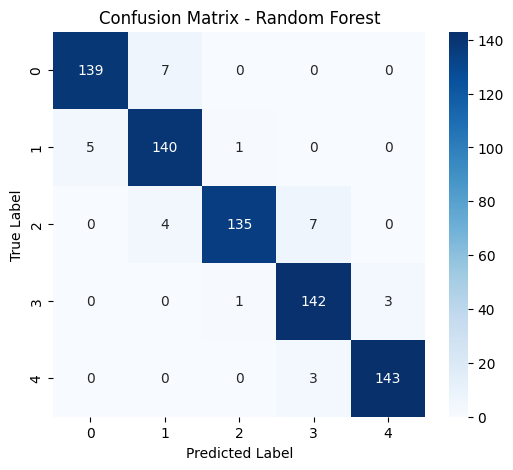

In [95]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rfc)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rfc))

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rfc)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()


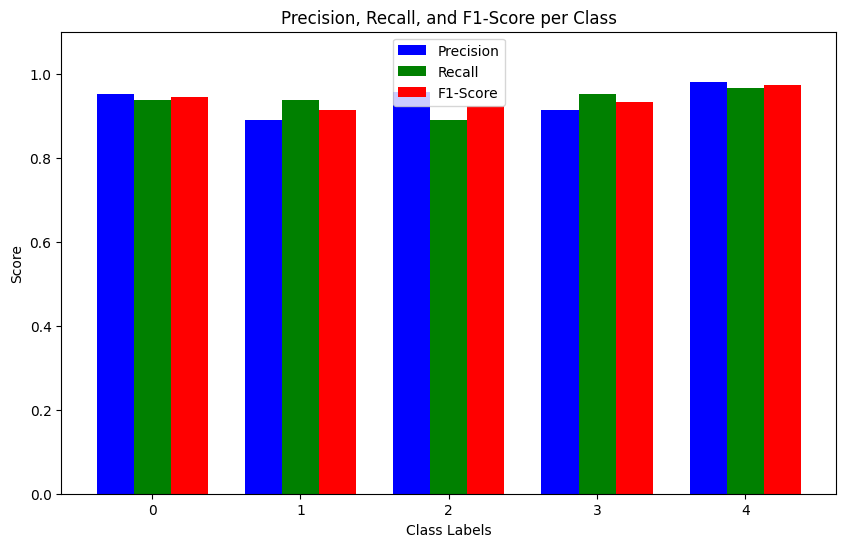

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Get classification report as a dictionary
report = classification_report(y_test, y_pred_gb, output_dict=True)

# Extract class labels
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

# Extract precision, recall, and f1-score values
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Set bar width
bar_width = 0.25
x = np.arange(len(classes))

# Plot the values
plt.figure(figsize=(10, 6))
plt.bar(x, precision, bar_width, label='Precision', color='blue')
plt.bar(x + bar_width, recall, bar_width, label='Recall', color='green')
plt.bar(x + 2 * bar_width, f1_score, bar_width, label='F1-Score', color='red')

# Labeling the plot
plt.xlabel("Class Labels")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score per Class")
plt.xticks(x + bar_width, classes)
plt.legend()
plt.ylim(0, 1.1)
plt.show()


RANDOM TREE CLASSIFIER

In [98]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
# Initialize and train the Support Vector Machine Classifier
svm_classifier = SVC(kernel="linear", random_state=42)  # You can change kernel to 'rbf', 'poly', etc.
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [101]:
# Predict on test data
y_pred_svc = svm_classifier.predict(X_test)
y_pred_svc

array([4, 0, 1, 0, 1, 4, 4, 2, 0, 1, 3, 2, 4, 2, 3, 3, 0, 4, 2, 0, 3, 4,
       0, 4, 2, 3, 2, 3, 1, 4, 3, 2, 2, 1, 1, 0, 0, 3, 4, 3, 4, 0, 0, 1,
       4, 1, 4, 0, 0, 4, 4, 4, 4, 0, 4, 1, 2, 4, 4, 0, 1, 3, 2, 1, 4, 1,
       1, 0, 3, 3, 2, 3, 2, 2, 1, 0, 4, 1, 1, 1, 2, 1, 3, 3, 2, 1, 2, 1,
       3, 3, 1, 2, 3, 1, 4, 4, 4, 0, 3, 0, 4, 0, 2, 1, 3, 3, 2, 4, 1, 1,
       3, 1, 3, 0, 4, 1, 3, 0, 2, 1, 3, 1, 0, 0, 3, 0, 2, 1, 4, 2, 0, 3,
       2, 4, 2, 1, 4, 0, 3, 2, 2, 4, 2, 0, 4, 2, 3, 4, 2, 1, 4, 1, 0, 0,
       4, 1, 4, 1, 0, 3, 1, 1, 0, 4, 2, 1, 2, 0, 1, 4, 0, 4, 4, 3, 3, 0,
       2, 2, 2, 1, 4, 1, 3, 4, 1, 4, 4, 0, 1, 3, 1, 0, 0, 2, 1, 2, 0, 2,
       0, 1, 0, 0, 4, 1, 4, 2, 2, 0, 3, 3, 1, 1, 3, 1, 3, 3, 2, 2, 0, 1,
       4, 0, 4, 2, 3, 3, 0, 2, 0, 4, 0, 1, 4, 2, 4, 2, 2, 3, 0, 4, 1, 1,
       2, 2, 3, 3, 3, 4, 2, 4, 3, 2, 3, 1, 3, 0, 1, 3, 4, 3, 4, 4, 3, 1,
       4, 2, 1, 1, 2, 0, 3, 3, 0, 1, 2, 1, 2, 4, 1, 1, 2, 3, 3, 1, 3, 2,
       2, 4, 2, 1, 2, 1, 0, 1, 4, 4, 0, 3, 1, 4, 1,

SVM Accuracy: 0.8959

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       146
           1       0.80      0.92      0.86       146
           2       0.87      0.85      0.86       146
           3       0.89      0.90      0.89       146
           4       0.97      0.94      0.95       146

    accuracy                           0.90       730
   macro avg       0.90      0.90      0.90       730
weighted avg       0.90      0.90      0.90       730



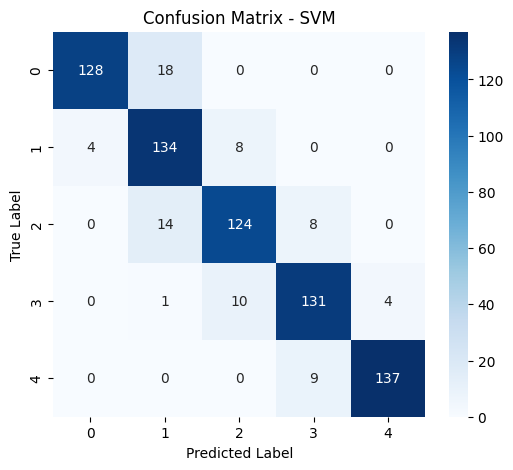

In [102]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svc)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()


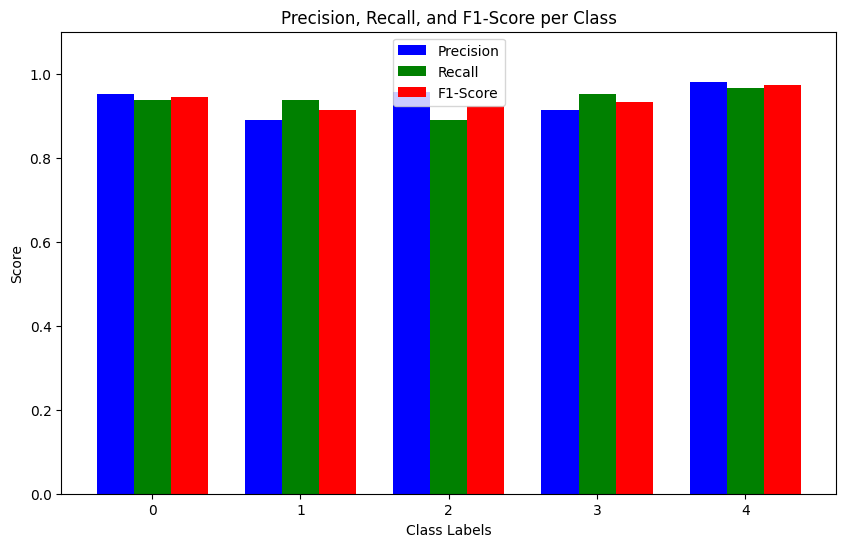

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Get classification report as a dictionary
report = classification_report(y_test, y_pred_gb, output_dict=True)

# Extract class labels
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

# Extract precision, recall, and f1-score values
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Set bar width
bar_width = 0.25
x = np.arange(len(classes))

# Plot the values
plt.figure(figsize=(10, 6))
plt.bar(x, precision, bar_width, label='Precision', color='blue')
plt.bar(x + bar_width, recall, bar_width, label='Recall', color='green')
plt.bar(x + 2 * bar_width, f1_score, bar_width, label='F1-Score', color='red')

# Labeling the plot
plt.xlabel("Class Labels")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score per Class")
plt.xticks(x + bar_width, classes)
plt.legend()
plt.ylim(0, 1.1)
plt.show()


K NEAREST NEIGHBOUR

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors'
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [111]:
y_pred_knn= knn_classifier.predict(X_test)
y_pred_knn

array([3, 0, 1, 0, 1, 4, 4, 2, 0, 1, 2, 3, 4, 2, 3, 3, 0, 4, 2, 0, 3, 3,
       0, 4, 3, 3, 2, 3, 2, 4, 3, 2, 2, 2, 1, 0, 0, 3, 4, 3, 4, 0, 0, 1,
       4, 0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 2, 2, 3, 3, 0, 1, 3, 2, 1, 4, 1,
       1, 0, 3, 3, 1, 3, 2, 2, 1, 0, 4, 1, 1, 1, 2, 1, 3, 3, 2, 1, 1, 1,
       3, 3, 1, 1, 3, 1, 4, 4, 4, 0, 3, 0, 4, 0, 0, 3, 3, 3, 2, 4, 1, 1,
       3, 0, 3, 0, 4, 1, 3, 0, 2, 0, 4, 1, 0, 0, 3, 0, 3, 2, 4, 2, 0, 3,
       2, 4, 2, 1, 4, 0, 3, 4, 2, 4, 2, 0, 4, 2, 3, 4, 2, 1, 4, 1, 0, 0,
       4, 1, 4, 1, 0, 3, 1, 1, 0, 4, 2, 1, 4, 0, 1, 4, 0, 4, 4, 3, 3, 0,
       2, 2, 2, 1, 2, 1, 3, 4, 1, 4, 4, 0, 1, 3, 1, 1, 0, 1, 1, 3, 0, 2,
       0, 0, 0, 0, 4, 1, 4, 2, 2, 0, 3, 3, 1, 1, 3, 1, 3, 3, 2, 2, 0, 1,
       3, 0, 4, 2, 3, 3, 0, 3, 0, 4, 0, 1, 4, 3, 1, 2, 2, 3, 0, 4, 0, 1,
       2, 3, 3, 3, 3, 4, 2, 4, 3, 3, 3, 1, 3, 0, 0, 3, 4, 4, 4, 4, 3, 1,
       4, 2, 1, 1, 2, 0, 3, 3, 0, 1, 2, 2, 3, 4, 0, 1, 1, 3, 3, 1, 3, 3,
       1, 4, 2, 1, 0, 1, 0, 1, 4, 4, 0, 3, 0, 4, 1,

KNN Accuracy: 0.8726

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       146
           1       0.85      0.91      0.88       146
           2       0.89      0.71      0.79       146
           3       0.80      0.91      0.85       146
           4       0.92      0.89      0.90       146

    accuracy                           0.87       730
   macro avg       0.88      0.87      0.87       730
weighted avg       0.88      0.87      0.87       730



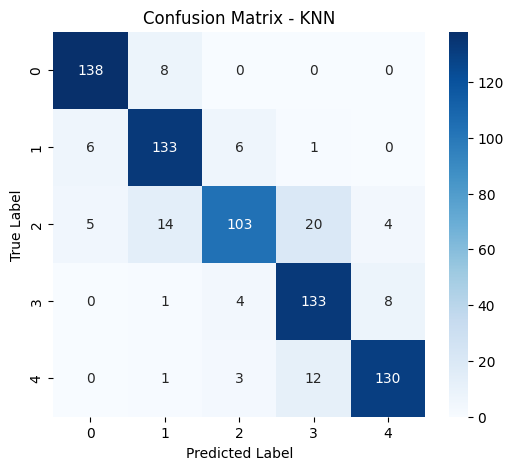

In [113]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN")
plt.show()


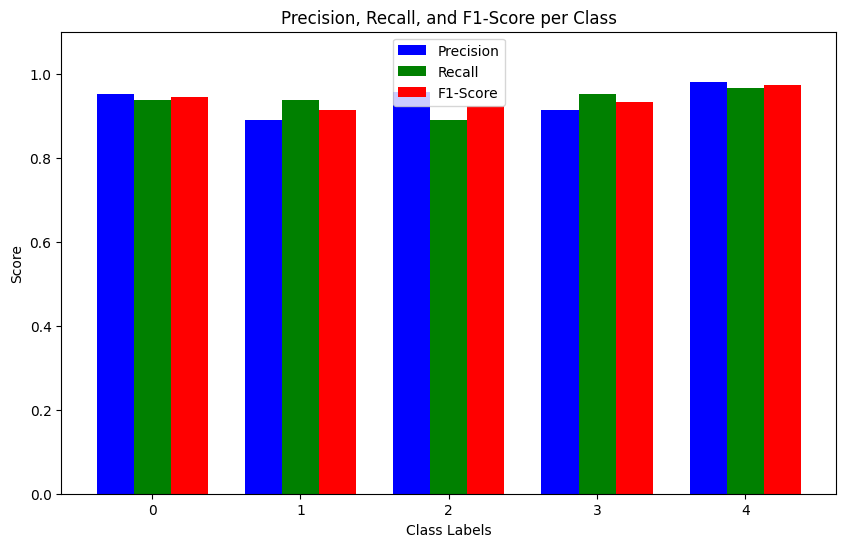

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Get classification report as a dictionary
report = classification_report(y_test, y_pred_gb, output_dict=True)

# Extract class labels
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

# Extract precision, recall, and f1-score values
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Set bar width
bar_width = 0.25
x = np.arange(len(classes))

# Plot the values
plt.figure(figsize=(10, 6))
plt.bar(x, precision, bar_width, label='Precision', color='blue')
plt.bar(x + bar_width, recall, bar_width, label='Recall', color='green')
plt.bar(x + 2 * bar_width, f1_score, bar_width, label='F1-Score', color='red')

# Labeling the plot
plt.xlabel("Class Labels")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score per Class")
plt.xticks(x + bar_width, classes)
plt.legend()
plt.ylim(0, 1.1)
plt.show()


GRADIENT BOOSTING

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [119]:
y_pred_gb= gb_classifier.predict(X_test)
y_pred_gb

array([4, 0, 1, 0, 1, 4, 4, 2, 0, 1, 2, 2, 4, 2, 4, 3, 0, 4, 2, 0, 3, 3,
       0, 4, 2, 3, 2, 3, 1, 4, 3, 2, 2, 2, 1, 0, 0, 3, 4, 3, 4, 0, 0, 1,
       4, 0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 2, 2, 3, 4, 0, 1, 3, 2, 1, 4, 1,
       1, 0, 3, 3, 1, 3, 2, 2, 1, 0, 4, 1, 1, 1, 2, 1, 3, 3, 2, 1, 2, 1,
       3, 3, 1, 2, 3, 1, 4, 4, 4, 0, 4, 0, 4, 1, 2, 1, 3, 3, 2, 4, 1, 1,
       3, 0, 3, 0, 4, 1, 3, 0, 2, 1, 3, 1, 0, 0, 3, 0, 2, 3, 4, 2, 0, 3,
       2, 4, 2, 1, 4, 0, 3, 3, 2, 4, 2, 0, 4, 2, 3, 4, 2, 1, 4, 1, 0, 0,
       4, 1, 4, 1, 0, 3, 1, 1, 0, 4, 2, 1, 2, 0, 1, 4, 0, 4, 4, 3, 3, 0,
       2, 2, 1, 1, 4, 1, 3, 4, 1, 4, 4, 0, 1, 3, 1, 1, 0, 2, 1, 3, 0, 2,
       0, 0, 0, 0, 4, 1, 4, 2, 2, 0, 3, 3, 1, 1, 3, 1, 3, 3, 2, 2, 0, 1,
       4, 0, 4, 2, 3, 3, 0, 3, 0, 4, 0, 1, 4, 2, 4, 2, 2, 3, 0, 4, 0, 1,
       2, 2, 3, 3, 3, 4, 3, 4, 3, 2, 3, 1, 3, 0, 1, 3, 4, 3, 4, 4, 3, 1,
       4, 2, 1, 1, 2, 0, 3, 3, 0, 1, 2, 1, 2, 4, 0, 1, 2, 3, 3, 1, 3, 2,
       2, 4, 2, 0, 2, 1, 0, 1, 4, 4, 0, 3, 0, 4, 1,

Gradient Boosting Accuracy: 0.9370

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       146
           1       0.89      0.94      0.91       146
           2       0.96      0.89      0.92       146
           3       0.91      0.95      0.93       146
           4       0.98      0.97      0.97       146

    accuracy                           0.94       730
   macro avg       0.94      0.94      0.94       730
weighted avg       0.94      0.94      0.94       730



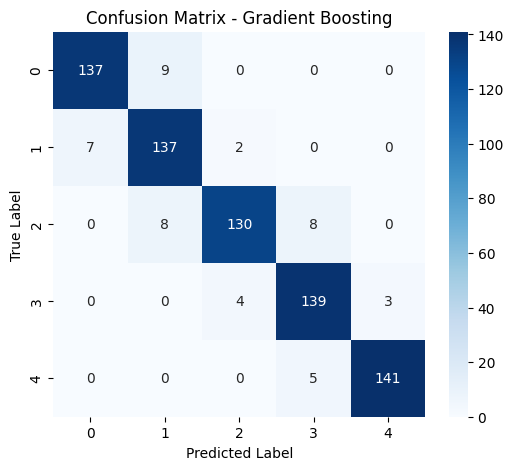

In [120]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


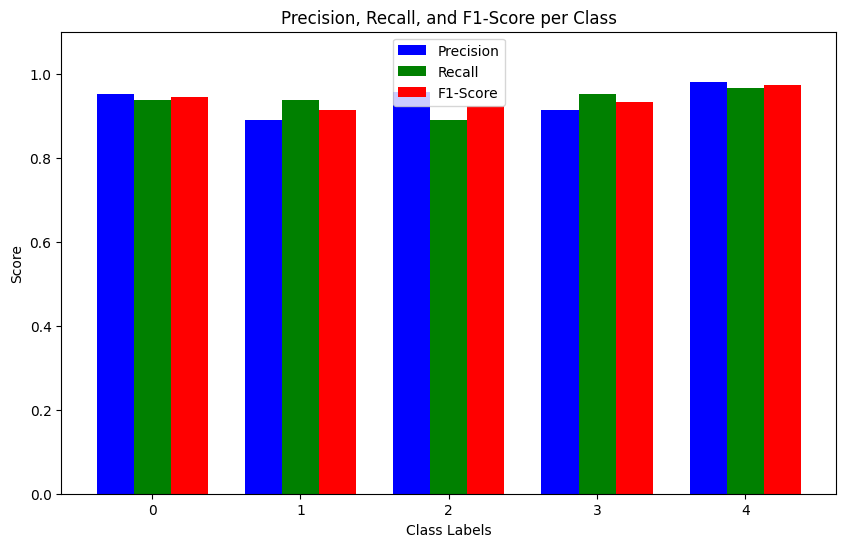

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Get classification report as a dictionary
report = classification_report(y_test, y_pred_gb, output_dict=True)

# Extract class labels
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

# Extract precision, recall, and f1-score values
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Set bar width
bar_width = 0.25
x = np.arange(len(classes))

# Plot the values
plt.figure(figsize=(10, 6))
plt.bar(x, precision, bar_width, label='Precision', color='blue')
plt.bar(x + bar_width, recall, bar_width, label='Recall', color='green')
plt.bar(x + 2 * bar_width, f1_score, bar_width, label='F1-Score', color='red')

# Labeling the plot
plt.xlabel("Class Labels")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score per Class")
plt.xticks(x + bar_width, classes)
plt.legend()
plt.ylim(0, 1.1)
plt.show()
